<a href="https://colab.research.google.com/github/maitreya-v/Transfer-Learning-ResNet50V2-EfficientNetB0/blob/master/TF_Transfer_learning_EfficientNetB7_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-26 16:16:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   115MB/s    in 1.4s    

2023-06-26 16:16:53 (115 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import zipfile

zipref = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zipref.extractall()
zipref.close()

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
train_directory = "/content/10_food_classes_10_percent/train"
test_directory = "/content/10_food_classes_10_percent/test"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
)


test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
base_model = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top = False,
    weights="imagenet",
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs,training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs)

258076736/258076736 [==============================] - 1s 0us/step


In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_dataset,
          epochs=5,
          steps_per_epoch=len(train_dataset),
          validation_data=test_dataset,
          validation_steps=int(0.25*len(test_dataset)))

Epoch 1/5
24/24 [==============================] - 54s 924ms/step - loss: 1.5895 - accuracy: 0.5733 - val_loss: 0.9487 - val_accuracy: 0.7845
Epoch 2/5
24/24 [==============================] - 15s 628ms/step - loss: 0.7849 - accuracy: 0.8227 - val_loss: 0.6389 - val_accuracy: 0.8503
Epoch 3/5
24/24 [==============================] - 19s 778ms/step - loss: 0.5806 - accuracy: 0.8573 - val_loss: 0.5410 - val_accuracy: 0.8651
Epoch 4/5
24/24 [==============================] - 16s 640ms/step - loss: 0.4778 - accuracy: 0.8933 - val_loss: 0.5042 - val_accuracy: 0.8618
Epoch 5/5
24/24 [==============================] - 16s 642ms/step - loss: 0.4085 - accuracy: 0.9107 - val_loss: 0.4786 - val_accuracy: 0.8668


In [7]:
model.evaluate(test_dataset)

79/79 [==============================] - 29s 358ms/step - loss: 0.4959 - accuracy: 0.8608


[0.495944082736969, 0.86080002784729]

In [8]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block1b_dwconv
19 block1b_bn
20 block1b_activation
21 block1b_se_squeeze
22 block1b_se_reshape
23 block1b_se_reduce
24 block1b_se_expand
25 block1b_se_excite
26 block1b_project_conv
27 block1b_project_bn
28 block1b_drop
29 block1b_add
30 block1c_dwconv
31 block1c_bn
32 block1c_activation
33 block1c_se_squeeze
34 block1c_se_reshape
35 block1c_se_reduce
36 block1c_se_expand
37 block1c_se_excite
38 block1c_project_conv
39 block1c_project_bn
40 block1c_drop
41 block1c_add
42 block1d_dwconv
43 block1d_bn
44 block1d_activation
45 block1d_se_squeeze
46 block1d_se_reshape
47 block1d_se_reduce
48 block1d_se_expand
49 block1d_se_excite
50 block1d_project_conv
51 block1d_project_bn
52 b

In [9]:
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.413767 to fit



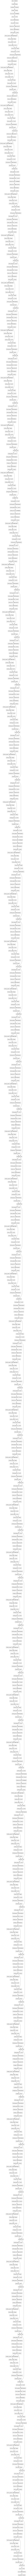

In [10]:
tf.keras.utils.plot_model(base_model)